# First steps with MarkedGraph.sage

First we load `MarkedGraph.sage` which defines the class of marked graphs

In [55]:
load('MarkedGraph.sage')

Define a graph and its fundamental group.

We choose a theta graph, which has fundamental group $F_2$,
the free group in two generators.

In [56]:
fundGroup = FreeGroup(2)

Now we build the graph. The edge labels represent the marking,
where edges labeled either `None` or the identity element in $F_2$
form the spanning tree, which is collapsed to a vertex to get the rose.

In [57]:
theta_1 = Graph(2)
theta_1.allow_multiple_edges(True)
theta_1.allow_loops(True)
edges1 = [(0, 1, fundGroup.0), (0, 1, fundGroup.1), (0, 1, None)]
theta_1.add_edges(edges1)

Let's have a look.

In [58]:
theta_1.plot(edge_labels=True).show()

Now let us make the graph metric, by choosing weights for the edges.

In [59]:
a0 = 1
a1 = 1
a2 = 1

weights1 = {edges1[0]: a0, edges1[1]: a1, edges1[2]: a2}
print('Weights of the edges of theta_1: {}'.format(weights1))

Weights of the edges of theta_1: {(0, 1, x1): 1, (0, 1, x0): 1, (0, 1, None): 1}


Note that alternatively, we could have used symbolic variables for the weights.

To do that, we would have set:

> ```
> var('a0 a1 a2')
> ```


Using the above graph and weights, we can produce an element of outer space.

In [60]:
markedTheta1 = MarkedGraph(graph=theta_1, weights=weights1)

We can now get the candidates for the Lipschitz metric. The first entry are the simple loops, the second entry figures of eights and the third entry all barbells.

In [61]:
print('Candidates Theta1: {}'.format(markedTheta1.candidates()))

Candidates Theta1: [[x1^-1, x0^-1, x1*x0^-1], [], []]


Let's similarly build a second graph, select weights, and build
a second element of outer space.

We introduce a small variation in the construction (compare to the code
used the first time).

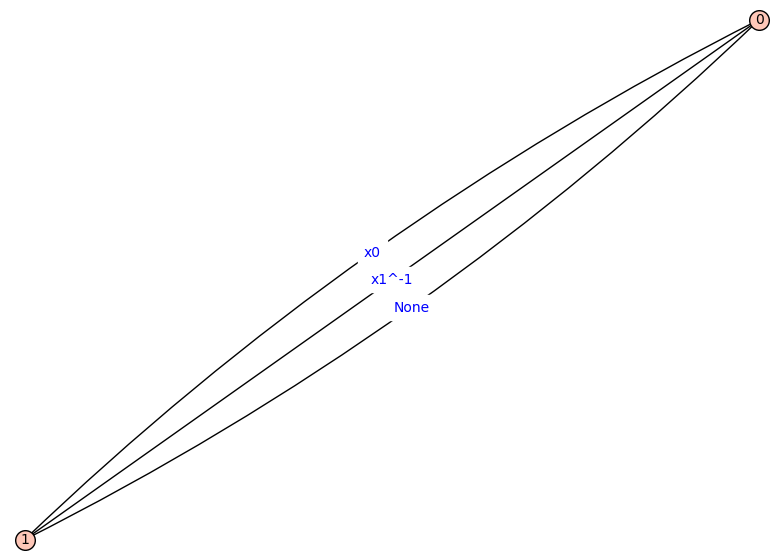

In [62]:
theta_2 = Graph(multiedges=True, loops=True)
theta_2.add_edges([(0, 1, fundGroup.0), (0, 1, fundGroup.1.inverse()), (0, 1, None)])
theta_2.plot(edge_labels=True).show()
edges2 = theta_2.edges()

In [63]:
b0 = 1
b1 = 1
b2 = 1

In [64]:
# The following probably changes the order of the edges, i.e. maybe
# edges2[0]!=(0,1,fundGroup.0). Important for the weighting function:
# don't forget the label (i.e. (v1, v2, label) not (v1, v2))!

weights2 = {edges2[0]: b0, edges2[1]: b1, edges2[2]: b2}
print('Weights of the edges of theta_2 : {}'.format(weights2))
markedTheta2 = MarkedGraph(graph=theta_2, weights=weights2)

Weights of the edges of theta_2 : {(0, 1, x0): 1, (0, 1, x1^-1): 1, (0, 1, None): 1}


Now we can compare the two marked graphs.

In [65]:
candFrac = markedTheta1.candFractions(markedTheta2)
print('The considered fractions from theta_1 to theta_2: {}'.format(candFrac))
distance = markedTheta1.distanceTo(markedTheta2)
print('The actual asymmetric distance from theta_1 to theta_2: {}'.format(distance))

The considered fractions from theta_1 to theta_2: {x1*x0^-1: 2, x1^-1: 1, x0^-1: 1}
The actual asymmetric distance from theta_1 to theta_2: log(2)


As you can see above you can either get all fractions of candidates or directly the asymmetric distance.
Keep in mind, that the asymmetric distance just returns the maximum of the candidate fractions,
so if you use symbolic variables this method will not return the distance!

In the example below, not all lengths were specified.

As a result, symbolic weights are introduced by the algorithm,
see `w1_1_x1x0`, `w2_2_x1`, `w1_2_None`.

Defining x0, x1


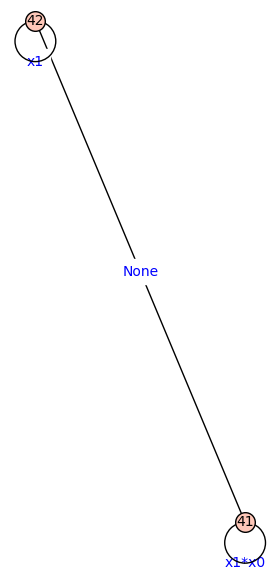

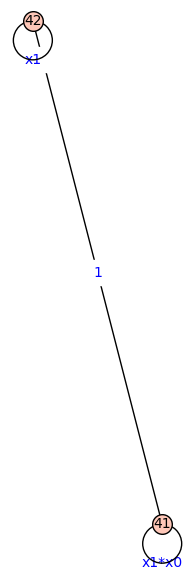

Weights:   (42, 42, x1)      w42_42_x1
  (41, 41, x1*x0)   w41_41_x1x0
  (41, 42, 1)       w41_42_None
Considerable fractions from theta_1 to barbell :
  x1*x0^-1   1/2*w41_41_x1x0 + w41_42_None + w42_42_x1
  x1^-1      1/2*w42_42_x1
  x0^-1      1/2*w41_41_x1x0 + w41_42_None + 1/2*w42_42_x1


In [66]:
# Inject variables to use them directly. You can also choose your variables if you
# write fundGroup= FreeGroup('a,b,c,d') or fundGroup=FreeGroup(x, 2)
fundGroup.inject_variables()
loop1 = x1*x0
loop2 = x1
barbell = Graph([(41,41,loop1),(41,42,None),(42,42,loop2)], loops=True, multiedges=True)
barbell.plot(edge_labels=True).show()
#edges=[(41,41,loop1),(41,42,None),(42,42,loop2)]
#barbell=Graph()
#barbell.allow_loops(True)
#barbell.allow_multiple_edges(True)
#barbell.add_edges(edges)


# Sets weights to some generic symbolic variables.
# These can later be changed by the function setWeights.
# Keep in mind, that now the distance function doesn't work
# properly, but the fractions do still exist!
markedBarbell = MarkedGraph(barbell)

# It keeps the weight in a apropriate way
newWeights = markedBarbell.getWeights()
# The additional vertices are introduced by makeGraphNice
print('Weights: {}'.format(table([(key, newWeights.get(key)) for key in newWeights.keys()])))
candFrac = markedTheta1.candFractions(markedBarbell)
print('Considerable fractions from theta_1 to barbell :')
print(table([(key, candFrac.get(key)) for key in candFrac.keys()]))

There is an embedded function to get rid of multiple edges and loops which keeps the marking:

In [0]:
print('How it looks like after getting rid of multiple edges and loops:')
# This was necessary in the first version, now it is a nice
# relic if you need to avoid multiple_edges and loops

markedBarbell.makeGraphNice(considerWeights=True)
markedBarbell.getGraph().plot(edge_labels=True).show()
markedBarbell.candidates()
markedBarbell.getSpanningTree().plot().show()

The example below is the same as Theta1 in the first example, just stretched by a factor two.

In [13]:
# Theta1 stretched
theta_1a = Graph(2)
theta_1a.allow_multiple_edges(True)
theta_1a.allow_loops(True)
edges1 = [(0, 1, fundGroup.0), (0, 1, fundGroup.1), (0, 1, None)]
theta_1a.add_edges(edges1)
theta_1a.plot(edge_labels=True)
weights1a = {edges1[0]:2,edges1[1]:2,edges1[2]:2}
markedTheta1a = MarkedGraph(graph=theta_1a, weights=weights1a)
distance = markedTheta1a.distanceTo(markedTheta1)
print('Distance from Theta1 to Theta1a (= 2*Theta1): {}'.format(distance))

Distance from Theta1 to Theta1a (= 2*Theta1): 0
